In [12]:
import pandas as  pd
data = pd.read_csv('Diabeticpreprocessing.csv')

In [13]:
data.columns

Index(['Unnamed: 0', 'preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi',
       'age', 'class'],
      dtype='object')

In [14]:
data = data.drop(['Unnamed: 0'], axis=1)

In [15]:
data.head(5)

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Prepare Your Data For Machine Learning

1. Rescale data.
2. Standardize data.
3. Normalize data.
4. Binarize data

 A diﬃculty is that diﬀerent algorithms make diﬀerent assumptions about your data and may require diﬀerent transforms

# 1.Rescale Data


Rescale Data : regression and neural networks and algorithms that use distance measures like k-Nearest Neighbors

In [16]:
data
X = data.drop('class',axis='columns')
Y = data[['class']]

In [17]:
Y

,class
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [18]:
X

,preg,plas,pres,skin,test,mass,pedi,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


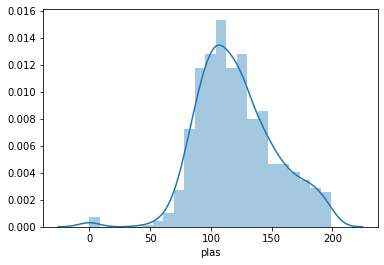

In [19]:
import seaborn as sns
sns.distplot(X.plas)

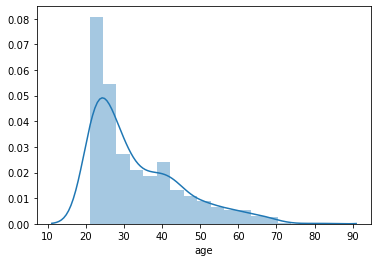

In [20]:
import seaborn as sns
sns.distplot(X.age)

In [21]:
X['age'].mean()

33.240885416666664

In [22]:
from sklearn.preprocessing import MinMaxScaler 


In [23]:
scaler = MinMaxScaler(feature_range=(0, 1))


In [24]:
rescaledX=scaler.fit_transform(X)

In [25]:
#scaler = MinMaxScaler(feature_range=(0, 1)) 

In [26]:
#rescaledX = scaler.fit_transform(X)


In [27]:
rescaledX

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.50074516, 0.23441503,
        0.48333333],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.39642325, 0.11656704,
        0.16666667],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.34724292, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.390462  , 0.07130658,
        0.15      ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.4485842 , 0.11571307,
        0.43333333],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.45305514, 0.10119556,
        0.03333333]])

In [28]:
from numpy import set_printoptions
set_printoptions(precision=3)

In [29]:
print(rescaledX[0:5,:])

[[0.353 0.744 0.59  0.354 0.    0.501 0.234 0.483]
 [0.059 0.427 0.541 0.293 0.    0.396 0.117 0.167]
 [0.471 0.92  0.525 0.    0.    0.347 0.254 0.183]
 [0.059 0.447 0.541 0.232 0.111 0.419 0.038 0.   ]
 [0.    0.688 0.328 0.354 0.199 0.642 0.944 0.2  ]]


# 2. Standardize Data


Standardize Data : with a mean of 0 and a standard deviation of 1

linear regression, logistic regression

In [31]:

from sklearn.preprocessing import StandardScaler

In [32]:
scaler = StandardScaler().fit(X) 
rescaledX1 = scaler.transform(X) 

In [33]:
set_printoptions(precision=3) 
print(rescaledX[0:5,:])

[[0.353 0.744 0.59  0.354 0.    0.501 0.234 0.483]
 [0.059 0.427 0.541 0.293 0.    0.396 0.117 0.167]
 [0.471 0.92  0.525 0.    0.    0.347 0.254 0.183]
 [0.059 0.447 0.541 0.232 0.111 0.419 0.038 0.   ]
 [0.    0.688 0.328 0.354 0.199 0.642 0.944 0.2  ]]


In [34]:
a = rescaledX1[:,7]

In [35]:
a.mean()

1.9313254699208451e-16

In [36]:
b = rescaledX1[:,1]

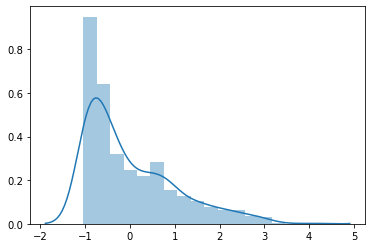

In [37]:
import seaborn as sns
sns.distplot(a)

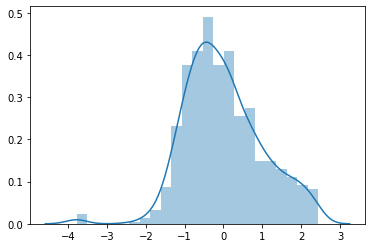

In [54]:
import seaborn as sns
sns.distplot(b)

# 3.Normalization

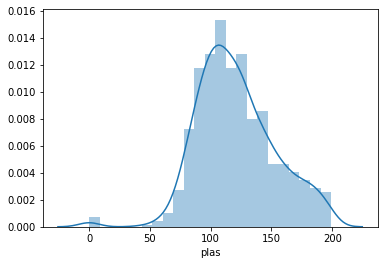

In [8]:
import seaborn as sns
sns.distplot(X.plas)

In [12]:
from sklearn.preprocessing import Normalizer

In [13]:
normal1 = Normalizer().fit(X) 
normalizedX = normal1.transform(X) # summarize transformed data set_printoptions(precision=3) print(normalizedX[0:5,:])

In [14]:
a = normalizedX[:,1]

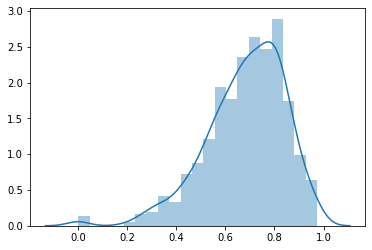

In [15]:
sns.distplot(a)

In [30]:
# summarize transformed data 
set_printoptions(precision=3) 
print(normalizedX[0:5,:])

[[0.034 0.828 0.403 0.196 0.    0.188 0.004 0.28 ]
 [0.008 0.716 0.556 0.244 0.    0.224 0.003 0.261]
 [0.04  0.924 0.323 0.    0.    0.118 0.003 0.162]
 [0.007 0.588 0.436 0.152 0.622 0.186 0.001 0.139]
 [0.    0.596 0.174 0.152 0.731 0.188 0.01  0.144]]


In [31]:
#Normalizing in scikit-learn refers to rescaling each observation (row) to have a length of 1 

# 4.Binarize Data

All values above the threshold are marked 1 and all equal to or below are marked as 0.

In [32]:
from sklearn.preprocessing import Binarizer

In [33]:
binarizer = Binarizer(threshold=0.0).fit(X)
binaryX = binarizer.transform(X)
# summarize transformed data 
set_printoptions(precision=3) 
print(binaryX[0:5,:])

#It is also useful when feature engineering and you want to add new features that indicate something meaningful


[[1. 1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 0. 0. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1. 1. 1. 1.]]


# Feature Selection For Machine 

# 1. Feature Selection


Feature selection is a process where you automatically select those features in your data that contribute most to the prediction variable or output in which you are interested. Having irrelevant features in your data can decrease the accuracy of many models, especially linear algorithms like linear and logistic regression. Three beneﬁts of performing feature selection before modeling your data are:


# Univariate Selection

In [36]:
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2

In [37]:
# feature extraction 
test = SelectKBest(score_func=chi2, k=4) 
fit = test.fit(X, Y) # summarize scores 
set_printoptions(precision=3) 
print(fit.scores_) 
features = fit.transform(X) # summarize selected features
print(features[0:5,:])


[ 111.52  1411.887   17.605   53.108 2175.565  127.669    5.393  181.304]
[[148.    0.   33.6  50. ]
 [ 85.    0.   26.6  31. ]
 [183.    0.   23.3  32. ]
 [ 89.   94.   28.1  21. ]
 [137.  168.   43.1  33. ]]


In [39]:
#['preg', 'plas',      'pres', 'skin',  'test',    'mass',   'pedi', 'age', ]
#[ 111.52  1411.887   17.605   53.108   2175.565  127.669    5.393  181.304]

The Recursive Feature Elimination (or RFE) works by recursively removing attributes and building a model on those attributes that remain.

 algorithm to select the top 3 features.

In [40]:
from sklearn.feature_selection import RFE 
from sklearn.linear_model import LogisticRegression 

In [41]:
model = LogisticRegression(solver='liblinear') 
rfe = RFE(model, 3) 
fit = rfe.fit(X, Y) 
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_) 
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 3
Selected Features: [ True False False False False  True  True False]
Feature Ranking: [1 2 3 5 6 1 1 4]


D:\DataScience\Anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# 3. Principal Component Analysis

Principal Component Analysis (or PCA) uses linear algebra to transform the dataset into a compressed form. Generally this is called a data reduction technique. A property of PCA is that you can choose the number of dimensions or principal components in the transformed result. In the example below, we use PCA and select 3 principal components

In [38]:
# feature extraction 
from sklearn.decomposition import PCA 
pca = PCA() 
fit = pca.fit(X) # summarize components 
 
print(fit.components_)


[[-2.022e-03  9.781e-02  1.609e-02  6.076e-02  9.931e-01  1.401e-02
   5.372e-04 -3.565e-03]
 [-2.265e-02 -9.722e-01 -1.419e-01  5.786e-02  9.463e-02 -4.697e-02
  -8.168e-04 -1.402e-01]
 [-2.246e-02  1.434e-01 -9.225e-01 -3.070e-01  2.098e-02 -1.324e-01
  -6.400e-04 -1.255e-01]
 [-4.905e-02  1.198e-01 -2.627e-01  8.844e-01 -6.555e-02  1.928e-01
   2.699e-03 -3.010e-01]
 [ 1.516e-01 -8.794e-02 -2.322e-01  2.600e-01 -1.723e-04  2.147e-02
   1.641e-03  9.205e-01]
 [-5.047e-03  5.074e-02  7.564e-02  2.214e-01 -6.133e-03 -9.708e-01
  -2.029e-03 -1.511e-02]
 [ 9.867e-01  8.834e-04 -1.230e-03 -3.764e-04  1.423e-03 -2.730e-03
  -6.344e-03 -1.626e-01]
 [ 6.101e-03 -8.255e-04  5.209e-04 -2.549e-03 -2.690e-04 -2.673e-03
   1.000e+00 -1.953e-03]]


# 4.Feature Importance


In [39]:
from sklearn.ensemble import ExtraTreesClassifier 

In [40]:
# feature extraction 
model = ExtraTreesClassifier(n_estimators=100) 
model.fit(X, Y) 
print(model.feature_importances_)

[0.108 0.241 0.098 0.077 0.075 0.139 0.119 0.143]


C:\Users\hp\Ananconda\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
